In [25]:
# Instala as bibliotecas extras que o ETL usa
!pip install -q gdown
!pip install -q unidecode

# Importa as bibliotecas necessárias
import gdown
import os
import zipfile
import glob
import pandas as pd
import numpy as np
import unidecode
import re

import matplotlib.pyplot as plt
import seaborn as sns
# Tudo para baixar, ler e trabalhar os dados.

In [26]:
# ID do arquivo no Google Drive (é o mesmo do notebook ETL)
file_id = "1207psedBKvnS0pJkDITroSzPiWrcz0ag"

# Nome do arquivo zip quando baixado
zip_path = "dados_vra.zip"

# Pasta onde o zip será extraído
extract_folder = "dados_vra"

# Se o zip ainda não existe na máquina do Colab, baixa do Drive
if not os.path.exists(zip_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    print("Baixando arquivo do Drive...")
    gdown.download(url, zip_path, quiet=False)
else:
    print("Arquivo ZIP já existe, download interrompido.")

# Se a pasta de dados ainda não existe, extrai o conteúdo do zip
if not os.path.exists(extract_folder):
    print("Extraindo arquivos do ZIP...")
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_folder)
else:
    print("Pasta de dados já existe.")


Arquivo ZIP já existe, download interrompido.
Pasta de dados já existe.


In [27]:
def carregar_vra(
    pasta="/content/dados_vra/dados_vra",
    padrao="VRA_*.csv",
    sep=";",
    encoding="latin-1",
    skiprows=1
):
    # Monta o caminho completo para procurar os arquivos CSV
    caminho_busca = os.path.join(pasta, padrao)

    # Lista todos os arquivos que batem com o padrão, ex: VRA_2020.csv, VRA_2021.csv...
    arquivos = sorted(glob.glob(caminho_busca))

    if not arquivos:
        raise FileNotFoundError(f"Nenhum arquivo encontrado com o padrão: {caminho_busca}")

    print(f"{len(arquivos)} arquivos encontrados:")

    dfs = []
    colunas_referencia = None

    # Lê cada arquivo e garante que todos tenham as mesmas colunas
    for arquivo in arquivos:
        df_temp = pd.read_csv(
            arquivo,
            sep=sep,
            encoding=encoding,
            skiprows=skiprows
        )

        # No primeiro arquivo, guarda a lista de colunas como referência
        if colunas_referencia is None:
            colunas_referencia = list(df_temp.columns)
            print("Colunas de referência definidas.")
        else:
            # Nos outros arquivos, compara se as colunas são iguais
            colunas_atual = list(df_temp.columns)
            if colunas_atual != colunas_referencia:
                print("Estrutura diferente!")
                print("Colunas esperadas: ", colunas_referencia)
                print("Colunas encontradas: ", colunas_atual)
                raise ValueError(f"Estrutura de colunas diferente no arquivo: {arquivo}")

        dfs.append(df_temp)

    # Junta todos os dataframes em um só
    df_final = pd.concat(dfs, ignore_index=True)
    print(f"\nConcatenação concluída.\nShape final: {df_final.shape}")

    return df_final

# Agora chamamos a função para criar o df principal
df = carregar_vra()


54 arquivos encontrados:
Colunas de referência definidas.


/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-306


Concatenação concluída.
Shape final: (3968418, 12)


In [28]:
df.head()


,ICAO Empresa AÃ©rea,NÃºmero Voo,CÃ³digo AutorizaÃ§Ã£o (DI),CÃ³digo Tipo Linha,ICAO AerÃ³dromo Origem,ICAO AerÃ³dromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,SituaÃ§Ã£o Voo,CÃ³digo Justificativa
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN


In [32]:
# Primeiro, vamos ver os nomes originais das colunas
df.columns


Index(['ICAO Empresa Aérea', 'Número Voo', 'Código Autorização (DI)',
       'Código Tipo Linha', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real',
       'Situação Voo', 'Código Justificativa'],
      dtype='object')

In [36]:
mapa_colunas = {
    "ICAO Empresa Área": "empresa_aerea",
    "Número Voo": "numero_voo",
    "Código Autorização (DI)": "codigo_autorizacao_di",
    "Código Tipo Linha": "codigo_tipo_linha",
    "ICAO Aeródromo Origem": "aerodromo_origem",
    "ICAO Aeródromo Destino": "aerodromo_destino",
    "Partida Prevista": "partida_prevista",
    "Partida Real": "partida_real",
    "Chegada Prevista": "chegada_prevista",
    "Chegada Real": "chegada_real",
    "Situação Voo": "situacao_voo",
    "Código Justificativa": "codigo_justificativa",
}

df = df.rename(columns=mapa_colunas)

df.columns.tolist()


['empresa_aerea',
 'numero_voo',
 'codigo_autorizacao_di',
 'codigo_tipo_linha',
 'aerodromo_origem',
 'aerodromo_destino',
 'partida_prevista',
 'partida_real',
 'chegada_prevista',
 'chegada_real',
 'situacao_voo',
 'codigo_justificativa']

In [ ]:
#df = df.rename(columns={"ICAO Empresa Aérea": "empresa_aerea"})
#df.columns.tolist()


In [37]:
df.columns.tolist()
df.head()


,empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,aerodromo_origem,aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN


In [38]:
# Converte as colunas de data/hora para o tipo datetime
df["partida_prevista"] = pd.to_datetime(df["partida_prevista"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["partida_real"]     = pd.to_datetime(df["partida_real"],     format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Calcula atraso da partida em minutos:
# (partida_real - partida_prevista) dá um "timedelta"
# .dt.total_seconds() / 60 converte para minutos
df["atraso_partida_min"] = (df["partida_real"] - df["partida_prevista"]).dt.total_seconds() / 60

df[["partida_prevista", "partida_real", "atraso_partida_min"]].head()


,partida_prevista,partida_real,atraso_partida_min
0,2021-01-09 20:25:00,2021-01-09 20:21:00,-4.0
1,2021-01-10 20:25:00,2021-01-10 20:24:00,-1.0
2,2021-01-11 20:25:00,2021-01-11 20:27:00,2.0
3,2021-01-12 20:25:00,2021-01-12 20:24:00,-1.0
4,2021-01-13 20:25:00,2021-01-13 20:16:00,-9.0


In [39]:
def classificar_situacao_partida(minutos):
    if pd.isna(minutos):
        return "Nao informado"
    if minutos < 0:
        return "Antecipado"
    if minutos <= 15:
        return "Pontual"
    if minutos <= 60:
        return "Atraso 30-60"
    if minutos <= 120:
        return "Atraso 60-120"
    if minutos <= 240:
        return "Atraso 120-240"
    return "Atraso 240"

df["situacao_partida"] = df["atraso_partida_min"].apply(classificar_situacao_partida)

df[["atraso_partida_min", "situacao_partida"]].head()


,atraso_partida_min,situacao_partida
0,-4.0,Antecipado
1,-1.0,Antecipado
2,2.0,Pontual
3,-1.0,Antecipado
4,-9.0,Antecipado


In [40]:
# Contando cada uma da situação de partida.
df["situacao_partida"].value_counts()


,count
situacao_partida,
Antecipado,2018719
Pontual,1042601
Atraso 30-60,455877
Nao informado,324318
Atraso 60-120,77812
Atraso 120-240,33185
Atraso 240,15906


In [43]:
df['situacao_partida'].unique()

array(['Antecipado', 'Pontual', 'Nao informado', 'Atraso 30-60',
       'Atraso 60-120', 'Atraso 120-240', 'Atraso 240'], dtype=object)

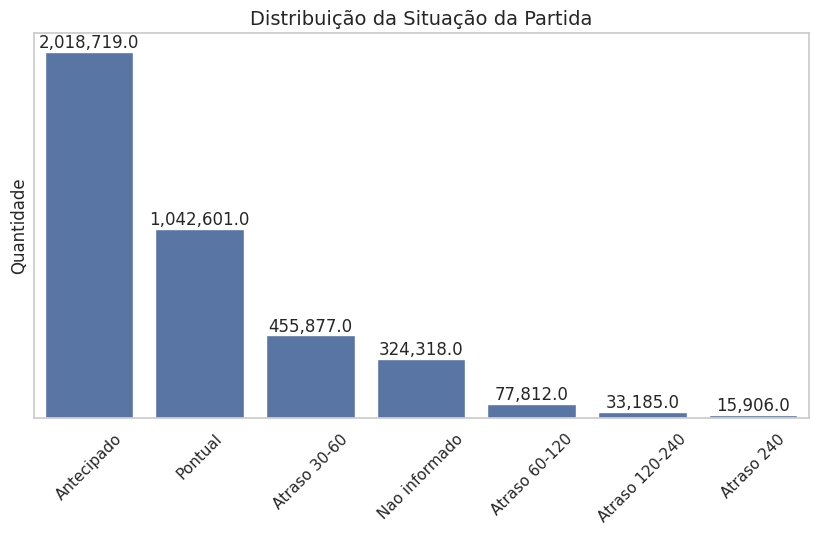

In [44]:
# Ajustar estilo (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


In [45]:
# Filtrar atrasos entre -60 e 180 minutos (conforme análise de pontualidade da
# aviação)

df_filtrado = df[(df["atraso_partida_min"] >= -60) &
                 (df["atraso_partida_min"] <= 180)]


Histograma com os atrasos em minutos.

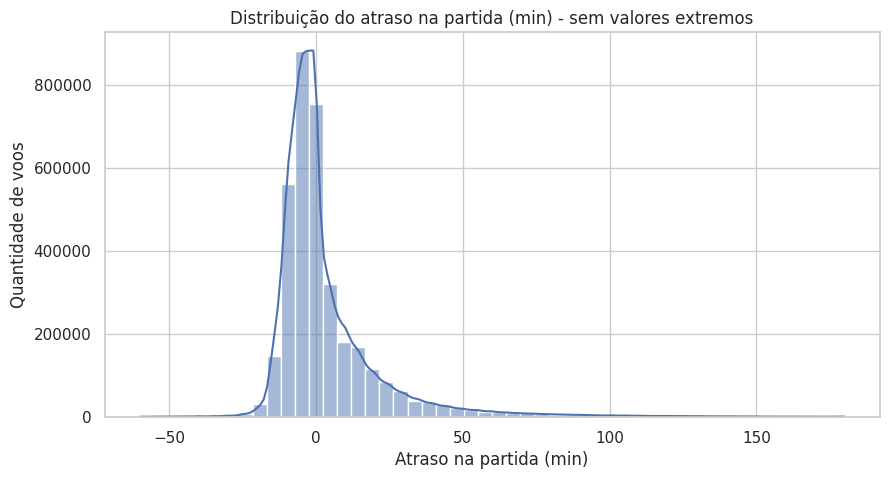

In [46]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_filtrado,
    x="atraso_partida_min",
    bins=50,
    kde=True
)
plt.title("Distribuição do atraso na partida (min) - sem valores extremos")
plt.xlabel("Atraso na partida (min)")
plt.ylabel("Quantidade de voos")
plt.show()


Os atrasos se concentram em torno de 0 minuto (concentração), com distribuição assimétrica à direita devido a uma cauda de voos com atrasos maiores, e presença de diversos valores mais distantes do centro, o que aumenta a dispersão.


Boxplot com atrasos em minutos.

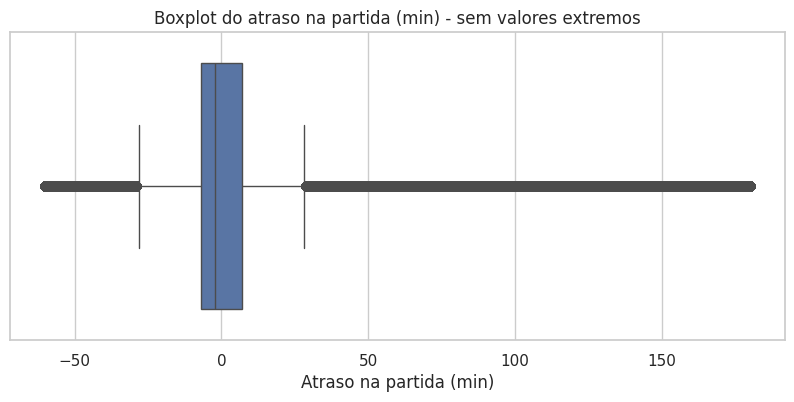

In [47]:

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtrado["atraso_partida_min"])
plt.title("Boxplot do atraso na partida (min) - sem valores extremos")
plt.xlabel("Atraso na partida (min)")
plt.show()


O boxplot mostra que metade dos voos está em uma faixa próxima de 0 minuto, enquanto os pontos mais afastados representam voos com atrasos bem acima do padrão."


Comparando atraso x pontualidade. (boxplot)

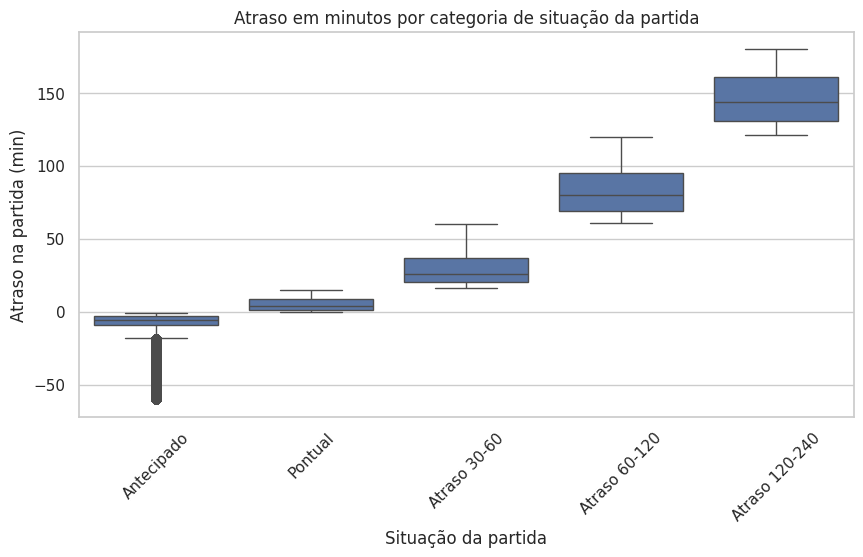

In [48]:

plt.figure(figsize=(10, 5))
ordem_categorias = [
    "Antecipado",
    "Pontual",
    "Atraso 30-60",
    "Atraso 60-120",
    "Atraso 120-240",
    "Atraso > 240",
    "Nao informado"
]

sns.boxplot(
    data=df_filtrado,
    x="situacao_partida",
    y="atraso_partida_min",
    order=[c for c in ordem_categorias
           if c in df_filtrado["situacao_partida"].unique()]
)

plt.title("Atraso em minutos por categoria de situação da partida")
plt.xlabel("Situação da partida")
plt.ylabel("Atraso na partida (min)")
plt.xticks(rotation=45)
plt.show()


Voos classificados como 'Antecipado' têm atrasos negativos; ' Pontual' fica concentrado próximo de 0 minuto; as categorias de atraso mostram caixas deslocadas para cima, com medianas e faixas de valores crescentes.

Isso indica que a variável numérica diferencia muito bem as categorias de pontualidade, sendo uma variável-chave para separar voos atrasados e pontuais."atraso_partida_min.

Gráfico de barras mostrando as classes desbalanceadas.

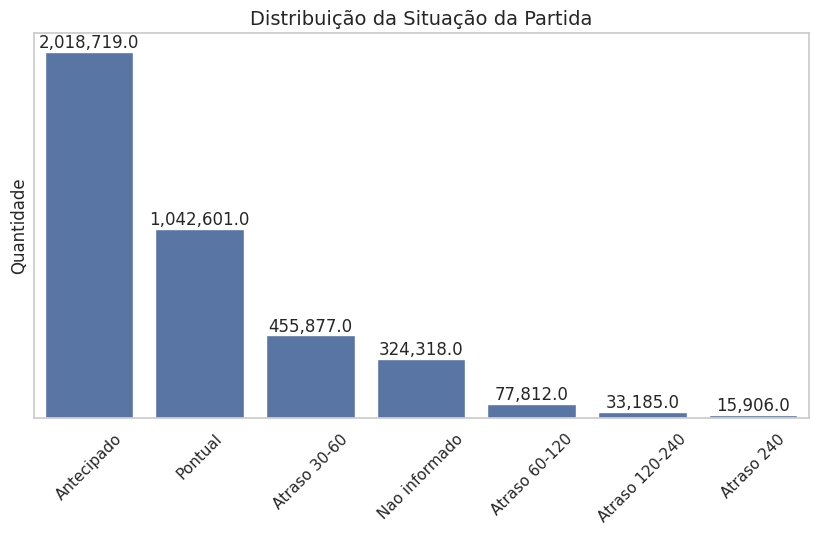

In [50]:
# Ajustar estilo (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


A maior parte dos voos é classificada como 'Antecipado' ou 'Pontual', enquanto as categorias de atrasos mais severos aparecem com bem menos registros, indicando desequilíbrio entre classes.

## Conclusão DS2 – Distribuições e Comportamento

Na dimensão DS2 foi analisada principalmente a variável numérica `atraso_partida_min`, calculada a partir da diferença entre a partida real e a partida prevista. A distribuição dessa variável, considerando a faixa entre -60 e 180 minutos, mostra forte concentração em torno de 0 minuto, com leve antecipação e uma cauda à direita, indicando a existência de voos com atrasos mais altos em menor quantidade. Ao comparar o atraso em minutos por categoria de `situacao_partida`, observa-se que voos “Antecipado” possuem valores negativos, “Pontual” fica próximo de 0 e as categorias de atraso apresentam medianas e faixas de valores progressivamente maiores. Assim, `atraso_partida_min` se destaca como a variável que melhor diferencia voos atrasados de pontuais, sendo um insumo importante para a etapa de modelagem do time.
